In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../Data/parkinsons_disease.csv")

In [3]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [80]:
df.shape

(195, 24)

In [4]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [5]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [6]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [7]:
from sklearn.model_selection import train_test_split
from numpy import randomS

SEED = 42
random.seed(SEED)

x = df.drop(columns=["status", "name"])
y = df['status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = SEED)

In [10]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(x_train, y_train)
dummy.score(x_test, y_test) * 100

74.57627118644068

In [8]:
from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators = 100, random_state=SEED)
classificador.fit(x_train, y_train)
classificador.score(x_test, y_test) * 100

93.22033898305084

# Correlação

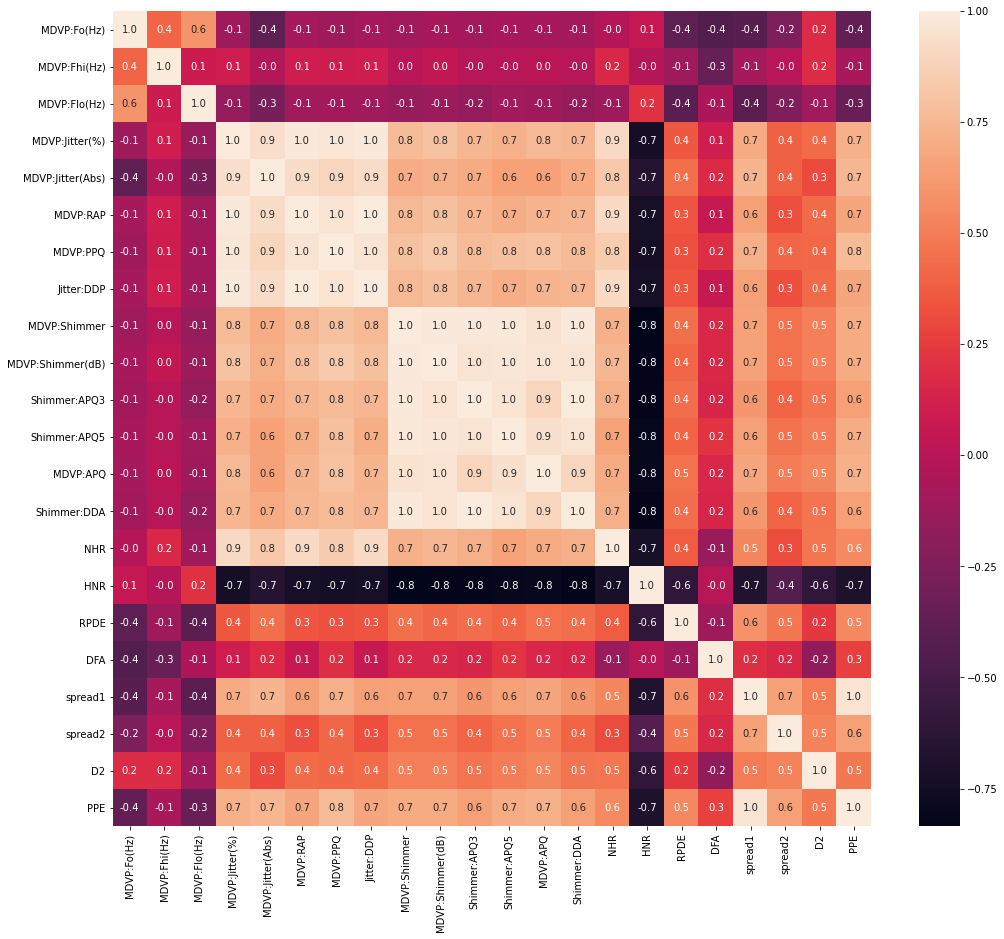

In [84]:
corr = x.corr()
plt.figure(figsize=(17,15))
sns.heatmap(data=corr, fmt=".1f", annot=True)

In [42]:
corr_v1 = corr[corr > 0.99]
corr_v1

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Fhi(Hz),NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Flo(Hz),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Jitter(%),NaN,NaN,NaN,1.000000,NaN,0.990276,NaN,0.990276,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Jitter(Abs),NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:RAP,NaN,NaN,NaN,0.990276,NaN,1.000000,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:PPQ,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jitter:DDP,NaN,NaN,NaN,0.990276,NaN,1.000000,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Shimmer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Shimmer(dB),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
corr_v2 = corr_v1.sum()
variaveis_correlacionadas = corr_v2[corr_v2 > 1]
variaveis_correlacionadas

MDVP:Jitter(%)    2.980552
MDVP:RAP          2.990275
Jitter:DDP        2.990276
Shimmer:APQ3      2.000000
Shimmer:DDA       2.000000
dtype: float64

In [95]:
x_corr = x.drop(["MDVP:RAP", "Shimmer:APQ3"], axis = 1 )

In [121]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 42
random.seed(SEED)

y = df['status']

x_train, x_test, y_train, y_test = train_test_split(x_corr, y, test_size = 0.3, random_state = SEED)

from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators = 100, random_state=SEED)
classificador.fit(x_train, y_train)
classificador.score(x_test, y_test) * 100

94.91525423728814

[Text(69.0, 0.5, 'Real'), Text(0.5, 51.0, 'Predição')]

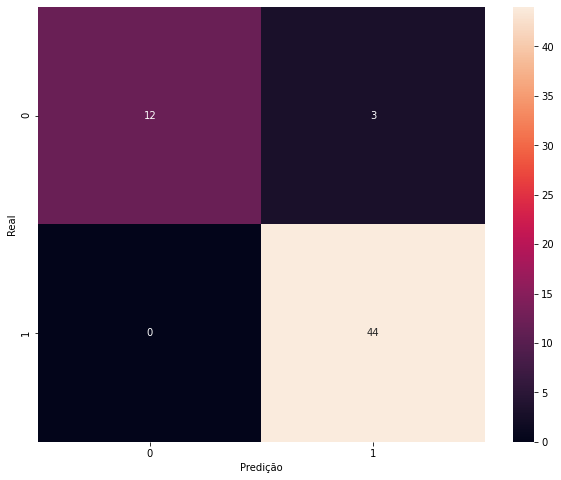

In [122]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y_test, classificador.predict(x_test))
plt.figure(figsize = (10, 8))
#sns.set(font_scale= 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel= "Real")

# Select Kbest

In [105]:
x.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.024081,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.016947,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.007190,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.013080,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.018260,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.029400,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.137780,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [98]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
minmax.fit(x)
x_minmax = minmax.transform(x)
x_minmax = pd.DataFrame(data=x_minmax, columns=x.keys())
x_minmax.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,0.184308,0.112592,0.054815,0.195680,0.249012,0.145472,0.247588,0.145288,0.312215,0.280197,...,0.172448,0.332584,0.068307,0.511745,0.369155,0.960148,0.569875,0.585765,0.390661,0.497310
1,0.198327,0.094930,0.278323,0.254130,0.288538,0.191233,0.323687,0.191042,0.472887,0.444536,...,0.279424,0.516048,0.059331,0.432577,0.470830,0.977024,0.703277,0.741337,0.473145,0.671326
2,0.165039,0.059128,0.265288,0.280178,0.328063,0.229287,0.369239,0.229411,0.390634,0.326212,...,0.219848,0.443317,0.039596,0.496220,0.404416,1.000000,0.636745,0.686371,0.408819,0.596682
3,0.165004,0.072927,0.264200,0.263342,0.328063,0.209056,0.324759,0.208862,0.414278,0.354971,...,0.233785,0.475478,0.040997,0.495936,0.416255,0.975885,0.695627,0.738089,0.436977,0.671949
4,0.161150,0.080909,0.260107,0.354511,0.407115,0.282755,0.437299,0.282870,0.499452,0.410025,...,0.286852,0.584542,0.054174,0.455499,0.375159,0.992813,0.762472,0.513798,0.404336,0.757611


In [117]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


#SelectKbest -> a partir de uma função matemática, 
#ele gera um score para cada feature e seleciona um determinado número de features dentre os melhores scores

#Chi2 -> Uma função matemática muito utilizada é o Qui-quadrado, 
#que usaremos para inferir quais features serão mais representativas para nosso processo de classificação

for i in range(1,23,1):

    selecionar_kmelhores = SelectKBest(chi2, k = i)

    SEED = 42
    random.seed(SEED)


    treino_x, teste_x, treino_y, teste_y = train_test_split(x_minmax, y, test_size = 0.3)

    selecionar_kmelhores.fit(treino_x, treino_y)
    #print("Exames selecionados:", list(x_minmax.columns[selecionar_kmelhores.get_support()]))
    #print("Exames removidos:", list(x_minmax.columns[~selecionar_kmelhores.get_support()]))
    treino_kbest = selecionar_kmelhores.transform(treino_x) # -> Vai te devolver os dados somente com as colunas que o SelectKBest selecionou
    teste_kbest = selecionar_kmelhores.transform(teste_x) # -> Vai te devolver os dados somente com as colunas que o SelectKBest selecionou
    classificador = RandomForestClassifier(n_estimators=100, random_state=SEED)
    classificador.fit(treino_kbest, treino_y)
    print("Resultado da classificação com %d exames: %.2f%%" % (i, classificador.score(teste_kbest, teste_y)* 100))

Resultado da classificação com 1 exames: 83.05%
Resultado da classificação com 2 exames: 88.14%
Resultado da classificação com 3 exames: 91.53%
Resultado da classificação com 4 exames: 88.14%
Resultado da classificação com 5 exames: 86.44%
Resultado da classificação com 6 exames: 88.14%
Resultado da classificação com 7 exames: 88.14%
Resultado da classificação com 8 exames: 89.83%
Resultado da classificação com 9 exames: 89.83%
Resultado da classificação com 10 exames: 88.14%
Resultado da classificação com 11 exames: 86.44%
Resultado da classificação com 12 exames: 86.44%
Resultado da classificação com 13 exames: 93.22%
Resultado da classificação com 14 exames: 93.22%
Resultado da classificação com 15 exames: 91.53%
Resultado da classificação com 16 exames: 86.44%
Resultado da classificação com 17 exames: 89.83%
Resultado da classificação com 18 exames: 88.14%
Resultado da classificação com 19 exames: 91.53%
Resultado da classificação com 20 exames: 93.22%
Resultado da classificação co

[Text(69.0, 0.5, 'Real'), Text(0.5, 51.0, 'Predição')]

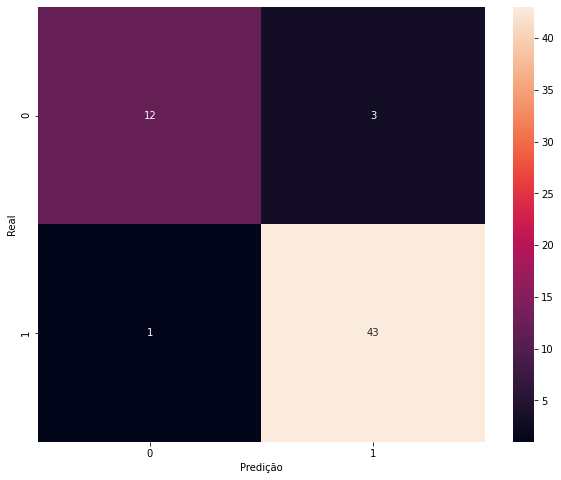

In [118]:
#Essa função nos retorna uma matriz na qual os elementos i são os valores reais 
#e os elementos j são os valores de predição.
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))
plt.figure(figsize = (10, 8))
#sns.set(font_scale= 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel= "Real")

# RFECV

Resultado da classificação 93.22%


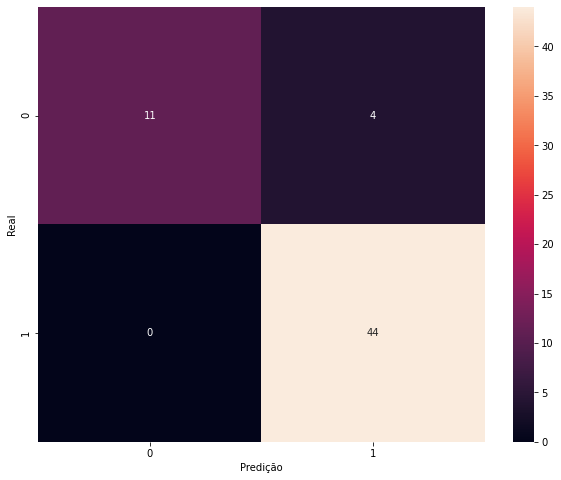

In [108]:
#RFE -> O RFECV divide o nosso banco de dados em blocos e aplica o algoritmo RFE, 
#em cada um desses blocos, gerando diferentes resultados.
#Dessa forma, O RFECV não só nos informa quantas features precisamos ter para gerar o melhor resultado possível, 
#como também quais features são essas.

from sklearn.feature_selection import RFECV

SEED = 42
random.seed(SEED)

#Teremos que recriá-lo, treinando-o com os dados treino_x e treino_y.
treino_x, teste_x, treino_y, teste_y = train_test_split(x_minmax, y, test_size = 0.3)
classificador = RandomForestClassifier(n_estimators=100, random_state=42)
classificador.fit(treino_x, treino_y)

#Esse método tem como entrada o estimador (estimator),
#o número de features que queremos selecionar (n_features_to_select), 
#o número de passos que ele dará (step)
selecionador_RFECV = RFECV(estimator = classificador, cv = 5, scoring = "accuracy", step = 1)
selecionador_RFECV.fit(treino_x, treino_y)

treino_RFECV = selecionador_RFECV.transform(treino_x)#transformaremos os dados de treino_x e os armazenaremos em uma variável treino_rfecv; 
teste_RFECV = selecionador_RFECV.transform(teste_x) #transformaremos os dados de teste_x e os armazenaremos em uma variável teste_rfecv; 
classificador.fit(treino_RFECV, treino_y)#e então ajustaremos o classificador com os dados treino_rfecv e treino_y.

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_RFECV))
plt.figure(figsize=(10,8))
sns.heatmap(matriz_confusao, annot=True, fmt="d").set(xlabel = "Predição", ylabel= "Real")
#sns.set(font_scale= 2)

print("Resultado da classificação %.2f%%" % (classificador.score(teste_RFECV, teste_y)* 100))

In [109]:
selecionador_RFECV.n_features_

14

In [111]:
treino_x.columns[selecionador_RFECV.support_] # retorno todas as features selecionadas

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:RAP', 'Jitter:DDP', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA',
       'NHR', 'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

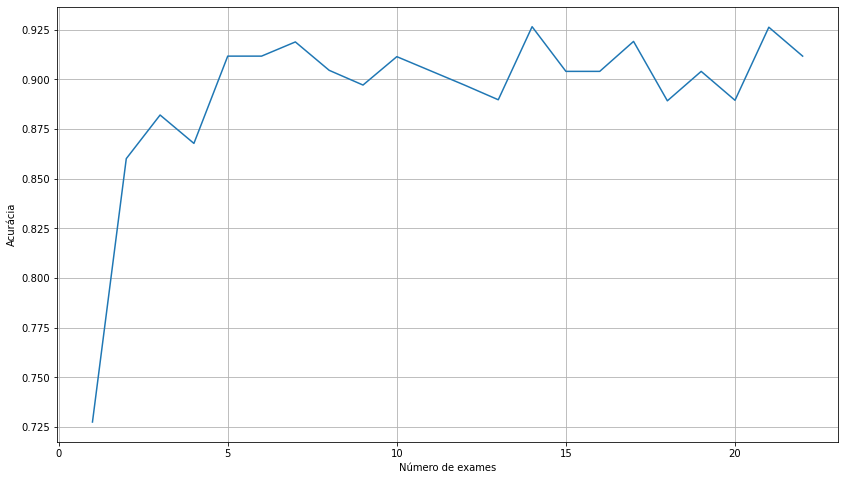

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")

plt.plot(range(1, len(selecionador_RFECV.grid_scores_) + 1), selecionador_RFECV.grid_scores_)
plt.grid(True)
plt.show()

#Observamos no gráfico que 14 é o número de features que apresenta o maior score.